In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qsotools import mocklib as lm
import qsotools.fiducial as fid
from scipy.interpolate import interp1d as scipy_interp1d

# Parameters
N_CELLS = 2**16 # 16 : 65536
Pixel_Width = 1. # km/s
redshifts = np.array([2.0, 2.4, 2.8, 3.2])

In [2]:
# Compute analytic power for different z
logn_karr, logn_apow = lm.lognPowerSpGH(redshifts, numvpoints=N_CELLS, dv=Pixel_Width)

Text(0,0.5,'$P(k)$')

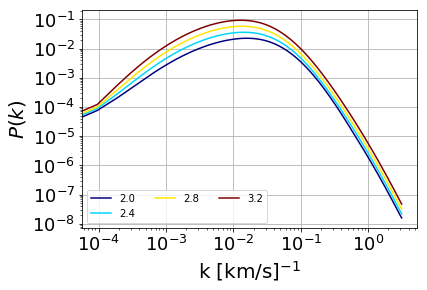

In [3]:
# Plot analytic power
color_array=[plt.cm.jet(i) for i in np.linspace(0, 1, redshifts.size)]

for i, r in enumerate(redshifts):
    plt.loglog(logn_karr, logn_apow[i]*logn_karr/np.pi, label="%.1f"%r, color=color_array[i])

plt.legend(ncol=3)
plt.grid(True)
ax=plt.gca()
plt.setp(ax.get_xticklabels(), fontsize = 18)
plt.setp(ax.get_yticklabels(), fontsize = 18)
plt.xlabel(r'k [km/s]$^{-1}$', fontsize = 20)
plt.ylabel(r'$P(k)$', fontsize = 20)

Text(0,0.5,'$\\delta P/P$')

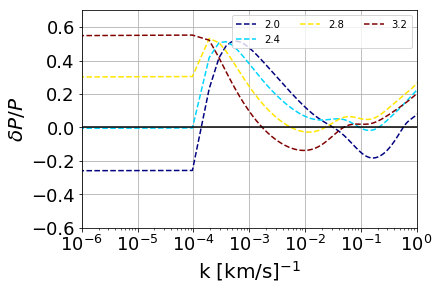

In [4]:
# Compare to PDW fit
KK, ZZ = np.meshgrid(logn_karr, redshifts)
pd13w17_fit = fid.evaluatePD13W17Fit(KK, ZZ)

for i, r in enumerate(redshifts):
    plt.semilogx(logn_karr, pd13w17_fit[i] / logn_apow[i] - 1, "--", label="%.1f"%r, color=color_array[i])

plt.xlim(1e-6, 1)
plt.ylim(-0.6,0.7)
plt.grid(True)
plt.legend(loc = "upper right", ncol=3)
plt.axhline(0, color='k')

ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize = 18)
plt.setp(ax.get_yticklabels(), fontsize = 18)
plt.xlabel(r'k [km/s]$^{-1}$', fontsize = 20)
plt.ylabel(r'$\delta P/P$', fontsize = 20)

A        = 7.300e-02
n        = -2.645e+00
alpha    = -2.546e-01
B        = 4.500e+00
beta     = -1.723e-01
lambda   = 4.497e+02

chisq = 173.19 dof =  131070


Text(0,0.5,'$\\Delta P/P_{true}$')

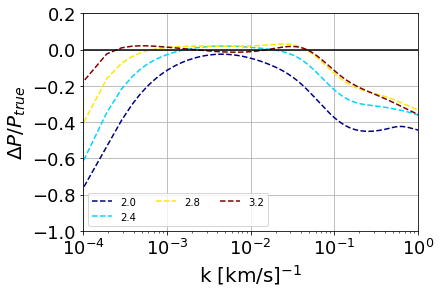

In [5]:
# Fit analytic power to PDW form
error = np.ones_like(KK)
pnew = fid.fitPD13Lorentzian(KK.ravel(), ZZ.ravel(), logn_apow.ravel(), error.ravel())

# Compare to new PDW fit to true
fitted_power = fid.evaluatePD13Lorentz((KK, ZZ), *pnew)

for i, r in enumerate(redshifts):
    plt.semilogx(logn_karr, fitted_power[i] / logn_apow[i] - 1, "--", label="%.1f"%r, color=color_array[i])

plt.xlim(1e-4, 1)
plt.ylim(-1,0.2)
plt.grid(True)
plt.legend(loc = "lower left", ncol=3)
plt.axhline(0, color='k')

ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize = 18)
plt.setp(ax.get_yticklabels(), fontsize = 18)
plt.xlabel(r'k [km/s]$^{-1}$', fontsize = 20)
plt.ylabel(r'$\Delta P/P_{true}$', fontsize = 20)

Text(0,0.5,'$P_N/P_S$')

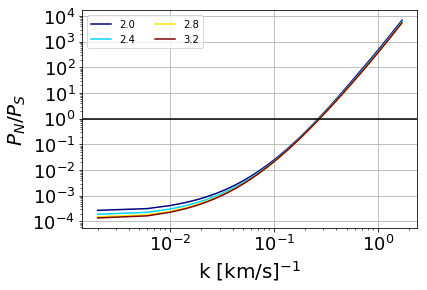

In [9]:
# Compare noise
ERR_FLUX = 0.1
DV       = 2.0
def noise_power_sp(sigma_f, z, dv):
    rs = sigma_f / lm.lognMeanFluxGH(z) * dv
    return rs**2

# Plot
color_array=[plt.cm.jet(i) for i in np.linspace(0, 1, redshifts.size)]

k_edges, k_centers = fid.formBins(6, 19, 0.004, 0.1, 0)
for i, r in enumerate(redshifts):
    # Interpolate p
    interp_p = scipy_interp1d(logn_karr, logn_apow[i])
    nsps = noise_power_sp(ERR_FLUX, r, DV) * np.ones_like(k_centers) 
    pzk  = interp_p(k_centers)
    sigma_z=nsps
#     sigma_z  = np.sqrt(pzk**2 + 2.*nsps**2)
    sigma_z /= np.sqrt(400)
#     sigma_z /= np.sqrt(200 * np.diff(k_edges) / 1.8e-4)
    plt.loglog(k_centers, sigma_z/pzk, label="%.1f"%r, color=color_array[i])

plt.legend(ncol=2)
plt.grid(True, "major")
ax=plt.gca()

plt.axhline(1, color='k')
# plt.xlim(5e-4, 1.1e-1)
# plt.ylim(0.09, 10)
plt.setp(ax.get_xticklabels(), fontsize = 18)
plt.setp(ax.get_yticklabels(), fontsize = 18)
plt.xlabel(r'k [km/s]$^{-1}$', fontsize = 20)
plt.ylabel(r'$P_N/P_S$', fontsize = 20)